In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf


gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)



2026-02-19 22:31:44.676288: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1 Physical GPUs, 1 Logical GPUs


2026-02-19 22:31:47.510372: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-02-19 22:31:47.569938: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-02-19 22:31:47.569998: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-02-19 22:31:47.571322: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2026-02-19 22:31:47.571372: I external/local_xla/xla/stream_executor

In [2]:
import configparser
import sys
sys.path.append('../src')
import Bibli_DataScience_3_3 as ds
import RNN_DataScience as rnn
config = configparser.ConfigParser()
config.read('Rakuten_config.ini')

section :  ['DOSSIER', 'FICHIER']


/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[]

In [3]:
import spacy
print(spacy.__version__)



3.7.2


In [4]:
"""
import importlib
importlib.reload(ds)
importlib.reload(rnn)
"""

section :  ['DOSSIER', 'FICHIER']


<module 'RNN_DataScience' from '/workspace/notebooks/../src/RNN_DataScience.py'>

Ce notebook fait partie d'un ensemble de sous-projets dont le resultat représente le **projet Rakuten** que j'ai réalisé pour mon diplôme de data Scientist chez Datascientest.com.  
Ce projet consiste en la classification à grande échelle des données de         produits multimodales (texte et image) en type de produits.  
Ce repositery est la partie **Réseaux de Neurones Récurrents** et ne traite que de la partie texte.  
Il fait suite à la partie **Machine Learning**    
Il utilise la bibliothèque **Bibli_DataScience** commune à l'ensemble du projet et la bibbliothèque **RNN_DataScience.py** propre à cette partie.  
D'autres dépots viendront, à savoir  :


*   La partie image  traitée par des réseaux convolutifs
*   Une quatrième partie qui est une syntèse par le media Streamlit



Ce notebook traite du Traitement automatique du langage naturel (natural language processing ou NLP) et teste plusieurs approches.

explication de la bibliothèque **RNN_DataScience.py**  :   

J'ai construit tout le code sur un modèle objet.  
Chaque modèle est une classe et hérite d'une classe générale **DS_RNN**  

*   Une `tokenisation` simple suivie d'une couche d'Embedding de tensorFlow -> classe **RNN_EMBEDDING**  
*   Une `tokenisation` puis une racinisation (`stemming`) suivie d'une couche d'Embedding de tensorFlow -> classe **RNN_STEMMER**
*   Une tokenisation puis une `lemmatisation` en utilisant `NLTK` suivie d'une couche d'Embedding de tensorFlow -> classe **RNN_LEMMER**
*   Une tokenisation puis une `lemmatisation` en utilisant `SPACY` suivie d'une couche d'Embedding de tensorFlow -> classe **RNN_SPACY**

Ces 4 modèles utilisent un réseau de neurones comportant une couche GRU.

Un cinquième modèle fait partie d'un notebook différent car son architecture est un peu différente (Word2VEC) : Modele_RNN_Word2Vec.ipynb  

Pour tous les modèles on utilise le même préprocessing de base :  

## ETAPE 1 : Passage en minuscule
Dans un premier temps, nous transformons les majuscules en minuscules car les étapes suivantes sont sensibles à la casse
## ETAPE 2: Tokenisation
 Il s’agit de décomposer une phrase, et donc un document, en tokens. Un token est un élément correspondant à un mot ou une ponctuation, cependant de nombreux cas ne sont pas triviaux à traiter :
Les mots avec un trait d’union, exemple : peut être et peut-être qui ont des significations très différentes ;
Les dates et heures qui peuvent être séparées par des points, des slashs, des deux points ;
Les apostrophes ;
Les caractères spéciaux : émoticônes, formules mathématiques.
## ETAPE 3: Retrait des stopwords
Ensuite, nous retirons les mots appartenant aux stopwords. Il s’agit de listes de mots définies au préalable soit par l’utilisateur soit dans des librairies existantes. Ces listes se composent de mots qui n’apportent aucune information, qui sont en général très courants et donc présents dans la plupart des documents, par exemple : je, nous, avoir (le verbe et ses conjugaisons). La suppression de ces stopwords permet de ne pas polluer les représentations des documents afin qu’elle ne contienne que les mots représentatifs et significatifs. Ce “nettoyage” du texte peut aussi s’accompagner de la suppression d’autres éléments comme les nombres, les dates, la ponctuation etc.


# Modèle 1 : classe RNN_EMBEDDING

#### Une tokenisation simple suivie d'une couche d'Embedding de tensorFlow
TOKENISATION + EMBEDDING

#####  instanciation du modèle **RNN_EMBEDDING**

In [5]:
emb = rnn.RNN_EMBEDDING("EMBEDDING")

Pandas Apply: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84916/84916 [00:00<00:00, 97063.89it/s]
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### **RNN_EMBEDDING** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [6]:
# entrainement du modèle
train_acc,val_acc,tloss,tvalloss = emb.fit_modele(6,savefics=True,Train='Save')

<class 'pandas.core.frame.DataFrame'>
Index: 67932 entries, 83256 to 20596
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67932 non-null  int64  
 1   designation     67932 non-null  object 
 2   description     44084 non-null  object 
 3   productid       67932 non-null  int64  
 4   imageid         67932 non-null  int64  
 5   PAYS_LANGUE     67932 non-null  object 
 6   RATIO_LANGUE    67932 non-null  float64
 7   ORIGINE_LANGUE  67932 non-null  object 
 8   pays_design     67932 non-null  object 
 9   Ratio_design    67932 non-null  float64
 10  pays_descr      44033 non-null  object 
 11  Ratio_descr     44033 non-null  float64
 12  descr_NaN       67932 non-null  bool   
 13  nom_image       67932 non-null  object 
 14  filepath        67932 non-null  object 
 15  phrases         67932 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 8.4+ MB
None
etape 

2026-02-19 22:41:12.712602: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906


2123/2123 ━━━━━━━━━━━━━━━━━━━━ 171s 78ms/step - accuracy: 0.5141 - loss: 1.6728 - val_accuracy: 0.6414 - val_loss: 1.2647 - learning_rate: 0.0010
Epoch 2/6
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 165s 78ms/step - accuracy: 0.8682 - loss: 0.4512 - val_accuracy: 0.8092 - val_loss: 0.7012 - learning_rate: 0.0010
Epoch 3/6
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 165s 78ms/step - accuracy: 0.9353 - loss: 0.2254 - val_accuracy: 0.8077 - val_loss: 0.8331 - learning_rate: 0.0010
Epoch 4/6
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 180s 85ms/step - accuracy: 0.9658 - loss: 0.1233 - val_accuracy: 0.8100 - val_loss: 0.8902 - learning_rate: 0.0010
Epoch 5/6
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 180s 85ms/step - accuracy: 0.9768 - loss: 0.0826 - val_accuracy: 0.8054 - val_loss: 0.9982 - learning_rate: 0.0010
Epoch 6/6
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9799 - loss: 0.0699
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 181s 85ms/step - accuracy: 0.9799 -

#### **RNN_EMBEDDING** : Optionnel : Récupération des données

In [11]:

# RECUPERATION
"""
train_acc,val_acc,tloss,tvalloss = emb.restore_fit_arrays()
y_orig,y_pred = emb.restore_predict_arrays()
df_pred = emb.restore_predict_dataframe()
"""


#### **RNN_EMBEDDING** : Affichage des precisions et des pertes par époque

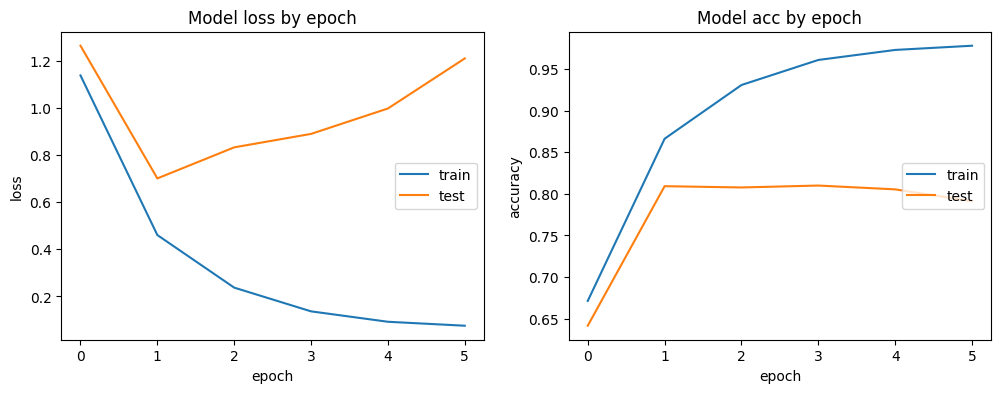

In [7]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **RNN_EMBEDDING** : Affichage des 3 principales prédictions par catégorie
Tableau des repartitions des **classes prédites** pour chaque **classe réelle**

In [8]:
df_pred = emb.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.508828,2705,0.152488,40,0.146067
1,40,40,0.784861,50,0.051793,2705,0.037849
2,50,50,0.875000,40,0.050595,2585,0.014881
3,60,60,0.759036,50,0.150602,40,0.042169
4,1140,1140,0.621723,1280,0.123596,40,0.078652
5,1160,1160,0.791403,40,0.102402,2705,0.042984
6,1180,1180,0.601307,40,0.124183,1280,0.052288
7,1280,1280,0.723819,1281,0.057495,40,0.043121
8,1281,1281,0.514493,1280,0.154589,40,0.108696
9,1300,1300,0.927651,2585,0.018831,1280,0.017839


#### **RNN_EMBEDDING** : Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : Le ratio des prédictions correctes pour chaque classe par rapport à toutes les prédictions faites pour cette classe.
2. Rappel (**Recall**) : Le ratio des prédictions correctes pour chaque classe par rapport au nombre total d'instances réelles de cette classe.
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une mesure unique de la performance qui équilibre les deux.
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [9]:
y_orig = emb.get_y_orig()
y_pred = emb.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 79.1156382477626 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.48      0.51      0.49       623
          40       0.42      0.78      0.54       502
          50       0.68      0.88      0.77       336
          60       0.95      0.76      0.85       166
        1140       0.82      0.62      0.71       534
        1160       0.94      0.79      0.86       791
        1180       0.55      0.60      0.57       153
        1280       0.73      0.72      0.72       974
        1281       0.66      0.51      0.58       414
        1300       0.96      0.93      0.95      1009
        1301       0.96      0.85      0.90       161
        1302       0.93      0.77      0.84       498
        1320       0.89      0.70      0.78       648
        1560       0.84      0.79      0.82      1015
        1920       0.92      0.89      0.90       861
        1940       0.72      0.84

#### **RNN_EMBEDDING** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.


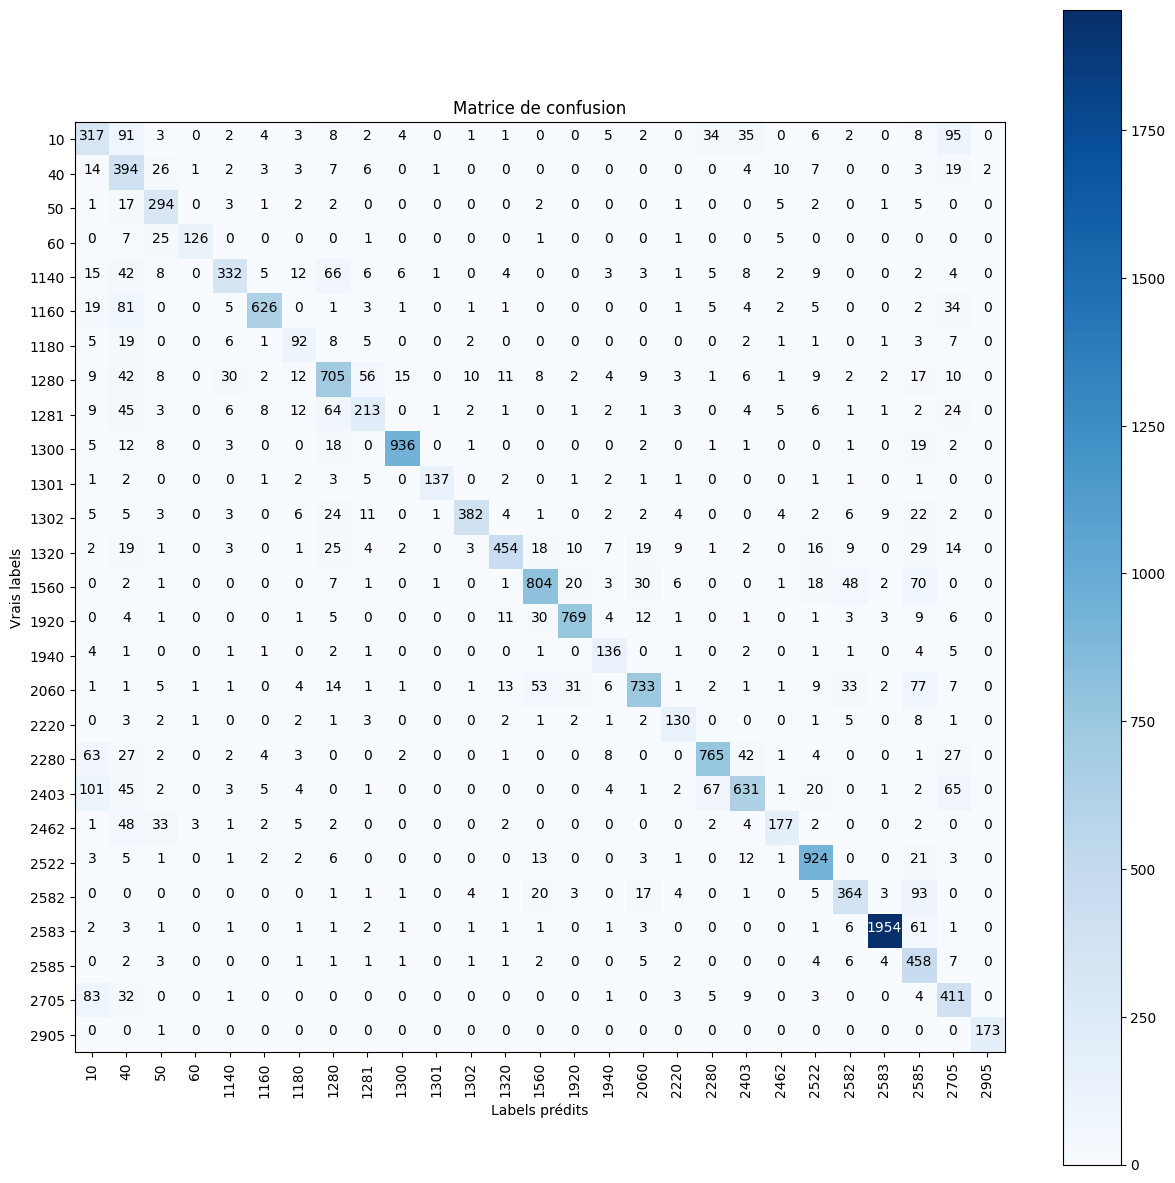

In [10]:
ds.show_confusion_matrix(y_orig, y_pred)

## ETAPE 4 : Groupement sémantique
Dès lors, nous disposons pour chaque document d’une liste “nettoyée” de mots porteurs de sens et séparés en tokens. Mais un mot peut être écrit au pluriel, au singulier ou avec différents accords et les verbes peuvent être conjugués à différents temps et personnes.
Nous devons donc réduire les différences grammaticales des mots en trouvant des formes communes. Pour ce faire, nous disposons de deux méthodes distinctes :
La stemmatisation, qui ne prend pas en compte le contexte de la phrase
La lemmatisation, qui prend en compte le contexte
### ETAPE 4.1 : La stemmatisation
La stemmatisation (ou racinisation) réduit les mots à leur radical ou racine.

# Modèle 2 : classe RNN_STEMMER

### Une tokenisation puis une racinisation (stemming) suivie d'une couche d'Embedding de tensorFlow
TOKENISATION + STEMMISATION + EMBEDDING

#### Chargement des Modules Personnalisés
On ajoute un chemin vers les modules personnalisés (Bibli_DataScience_3_3,RNN_DataScience ) pour charger des fonctions ou classes spécifiques nécessaires à l'analyse.

In [ ]:
import Bibli_DataScience_3_3 as ds
import RNN_DataScience as rnn

In [ ]:
#import importlib
#importlib.reload(ds)
#importlib.reload(rnn)

section :  ['DOSSIER', 'FICHIER']


<module 'RNN_DataScience' from '/content/Rakuten_Text_Classification_TensorFlow/src/RNN_DataScience.py'>

#####  instanciation du modèle **RNN_STEMMER**

In [10]:
stem = rnn.RNN_STEMMER("EMBEDDING STEMMER")


Pandas Apply: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84916/84916 [00:00<00:00, 106545.19it/s]
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### **RNN_STEMMER** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [11]:
# entrainement du modèle
train_acc,val_acc,tloss,tvalloss = stem.fit_modele(5,True,stemming=True)

<class 'pandas.core.frame.DataFrame'>
Index: 67932 entries, 83256 to 20596
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67932 non-null  int64  
 1   designation     67932 non-null  object 
 2   description     44084 non-null  object 
 3   productid       67932 non-null  int64  
 4   imageid         67932 non-null  int64  
 5   PAYS_LANGUE     67932 non-null  object 
 6   RATIO_LANGUE    67932 non-null  float64
 7   ORIGINE_LANGUE  67932 non-null  object 
 8   pays_design     67932 non-null  object 
 9   Ratio_design    67932 non-null  float64
 10  pays_descr      44033 non-null  object 
 11  Ratio_descr     44033 non-null  float64
 12  descr_NaN       67932 non-null  bool   
 13  nom_image       67932 non-null  object 
 14  filepath        67932 non-null  object 
 15  phrases         67932 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 8.4+ MB
None
etape 

#### **RNN_STEMMER** : Optionnel : Récupération des données

In [ ]:
# RECUPERATION
"""
train_acc,val_acc,tloss,tvalloss = stem.restore_fit_arrays()
y_orig,y_pred = stem.restore_predict_arrays()
df_pred = stem.restore_predict_dataframe()

"""

#### **RNN_STEMMER** : Affichage des precisions et des pertes par époque

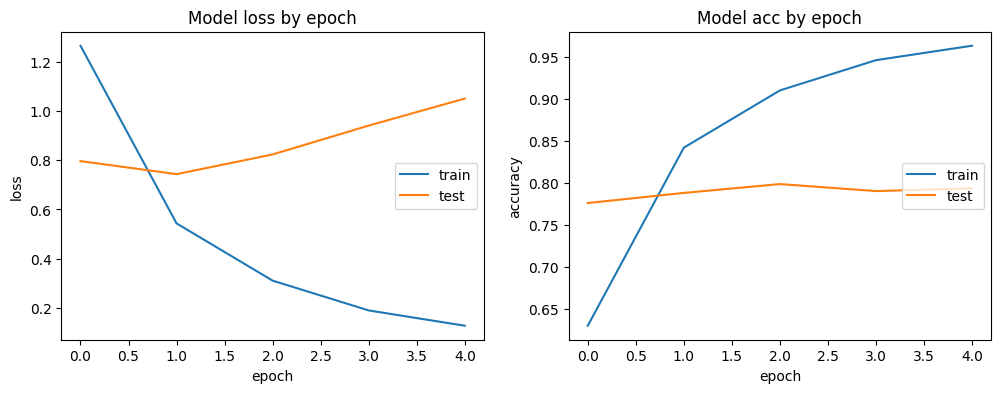

In [12]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **RNN_STEMMER** : Affichage des 3 principales prédictions par catégorie
Tableau des repartitions des **classes prédites** pour chaque **classe réelle**

In [13]:
df_pred = stem.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.600321,2705,0.089888,2403,0.073836
1,40,40,0.599602,10,0.099602,2462,0.067729
2,50,50,0.827381,2462,0.041667,40,0.029762
3,60,60,0.825301,2462,0.096386,50,0.036145
4,1140,1140,0.664794,1280,0.089888,1160,0.029963
5,1160,1160,0.863464,10,0.053097,2280,0.015171
6,1180,1180,0.535948,1280,0.104575,10,0.071895
7,1280,1280,0.764887,1140,0.049281,1320,0.027721
8,1281,1281,0.396135,1280,0.282609,10,0.050725
9,1300,1300,0.945491,1280,0.023786,10,0.005946


#### **RNN_STEMMER** : Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : Le ratio des prédictions correctes pour chaque classe par rapport à toutes les prédictions faites pour cette classe.
2. Rappel (**Recall**) : Le ratio des prédictions correctes pour chaque classe par rapport au nombre total d'instances réelles de cette classe.
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une mesure unique de la performance qui équilibre les deux.
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [14]:
#y_orig = ds.load_ndarray('EMBEDDING STEMMER_y_orig')
#y_pred = ds.load_ndarray('EMBEDDING STEMMER_y_pred')
y_orig = stem.get_y_orig()
y_pred = stem.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 79.38059349976449 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.36      0.60      0.45       623
          40       0.68      0.60      0.64       502
          50       0.76      0.83      0.79       336
          60       0.96      0.83      0.89       166
        1140       0.76      0.66      0.71       534
        1160       0.84      0.86      0.85       791
        1180       0.73      0.54      0.62       153
        1280       0.68      0.76      0.72       974
        1281       0.72      0.40      0.51       414
        1300       0.91      0.95      0.92      1009
        1301       0.94      0.84      0.89       161
        1302       0.77      0.82      0.79       498
        1320       0.81      0.78      0.80       648
        1560       0.74      0.86      0.79      1015
        1920       0.92      0.90      0.91       861
        1940       0.94      0.6

#### **RNN_STEMMER** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

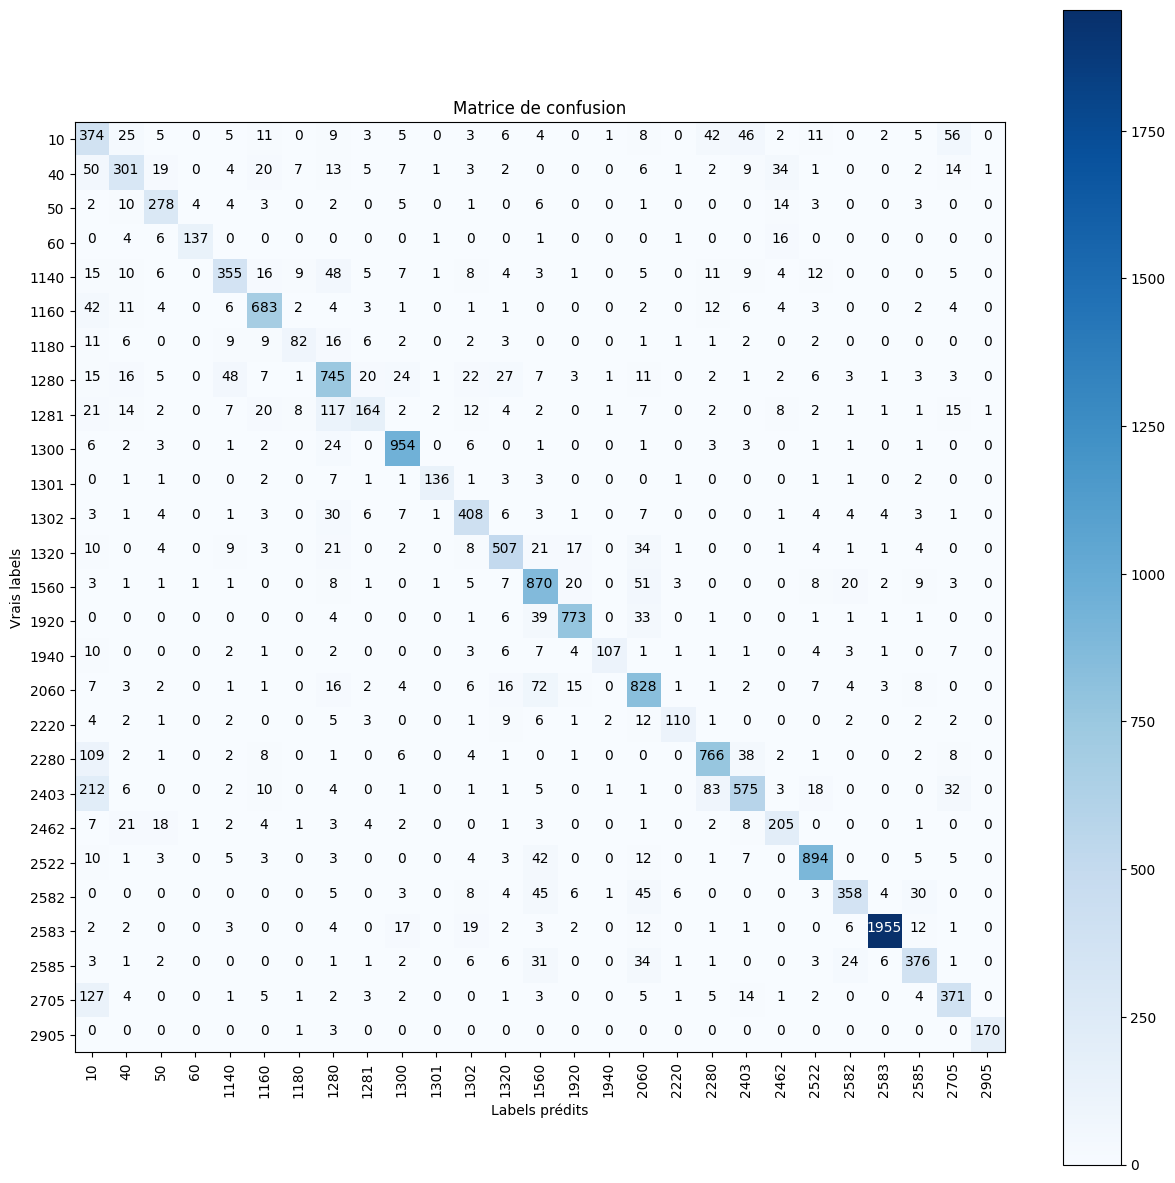

In [15]:
ds.show_confusion_matrix(y_orig, y_pred)

### ETAPE 4.2 : La Lemmatisation
La lemmatisation, qui prend en considération le contexte dans lequel le mot est écrit, a pour but de trouver la forme canonique du mot, le lemme. Par conséquent, elle doit se faire après la transformation des lettres majuscules en minuscules et avant la tokenisation car les mots présents avant et après sont importants pour déterminer la nature du mot.
Le lemme correspond à l’infinitif des verbes et à la forme au masculin singulier des noms, adjectifs et articles. Par exemple cette méthode est capable de faire la différence entre “nous avions” : verbe avoir et “les avions” : le pluriel d’un avion.

# Modèle 3 : classe RNN_LEMMER

### Une tokenisation puis une lemmatisation en utilisant NLTK suivie d'une couche d'Embedding de tensorFlow
EMBEDDING + LEMMISATION

#####  instanciation du modèle **RNN_LEMMER**

In [16]:
lem = rnn.RNN_LEMMER("EMBEDDING LEMMER")

Pandas Apply: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84916/84916 [00:00<00:00, 106135.90it/s]
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### **RNN_LEMMER** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [17]:
# entrainement du modèle
train_acc,val_acc,tloss,tvalloss = lem.fit_modele(5,True,lemming=True)

<class 'pandas.core.frame.DataFrame'>
Index: 67932 entries, 83256 to 20596
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67932 non-null  int64  
 1   designation     67932 non-null  object 
 2   description     44084 non-null  object 
 3   productid       67932 non-null  int64  
 4   imageid         67932 non-null  int64  
 5   PAYS_LANGUE     67932 non-null  object 
 6   RATIO_LANGUE    67932 non-null  float64
 7   ORIGINE_LANGUE  67932 non-null  object 
 8   pays_design     67932 non-null  object 
 9   Ratio_design    67932 non-null  float64
 10  pays_descr      44033 non-null  object 
 11  Ratio_descr     44033 non-null  float64
 12  descr_NaN       67932 non-null  bool   
 13  nom_image       67932 non-null  object 
 14  filepath        67932 non-null  object 
 15  phrases         67932 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 8.4+ MB
None
etape 

#### **RNN_LEMMER** : Optionnel : Récupération des données

In [ ]:
# RECUPERATION
"""
train_acc,val_acc,tloss,tvalloss = lem.restore_fit_arrays()
y_orig,y_pred = lem.restore_predict_arrays()
df_pred = lem.restore_predict_dataframe()

"""

#### **RNN_LEMMER** : Affichage des precisions et des pertes par époque

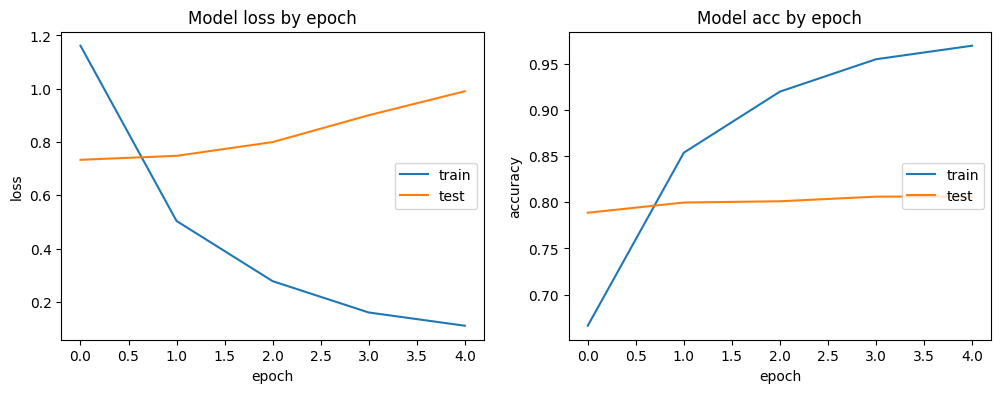

In [18]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **RNN_LEMMER** : Affichage des 3 principales prédictions par catégorie
Tableau des repartitions des **classes prédites** pour chaque **classe réelle**

In [19]:
df_pred = lem.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.576244,2705,0.115570,2403,0.096308
1,40,40,0.671315,10,0.057769,2462,0.051793
2,50,50,0.791667,2462,0.059524,40,0.044643
3,60,60,0.777108,2462,0.114458,50,0.066265
4,1140,1140,0.659176,1280,0.123596,40,0.033708
5,1160,1160,0.860936,10,0.050569,40,0.026549
6,1180,1180,0.568627,40,0.091503,1280,0.058824
7,1280,1280,0.788501,1281,0.056468,1140,0.037988
8,1281,1281,0.492754,1280,0.224638,40,0.041063
9,1300,1300,0.926660,1280,0.037661,10,0.005946


#### **RNN_LEMMER** : Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : Le ratio des prédictions correctes pour chaque classe par rapport à toutes les prédictions faites pour cette classe.
2. Rappel (**Recall**) : Le ratio des prédictions correctes pour chaque classe par rapport au nombre total d'instances réelles de cette classe.
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une mesure unique de la performance qui équilibre les deux.
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [20]:

y_orig = lem.get_y_orig()
y_pred = lem.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 80.61705134243994 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.44      0.58      0.50       623
          40       0.64      0.67      0.65       502
          50       0.80      0.79      0.79       336
          60       0.97      0.78      0.86       166
        1140       0.80      0.66      0.72       534
        1160       0.86      0.86      0.86       791
        1180       0.71      0.57      0.63       153
        1280       0.64      0.79      0.70       974
        1281       0.57      0.49      0.53       414
        1300       0.97      0.93      0.95      1009
        1301       0.96      0.88      0.92       161
        1302       0.89      0.76      0.82       498
        1320       0.88      0.73      0.80       648
        1560       0.74      0.88      0.80      1015
        1920       0.88      0.93      0.90       861
        1940       0.93      0.7

#### **RNN_LEMMER** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

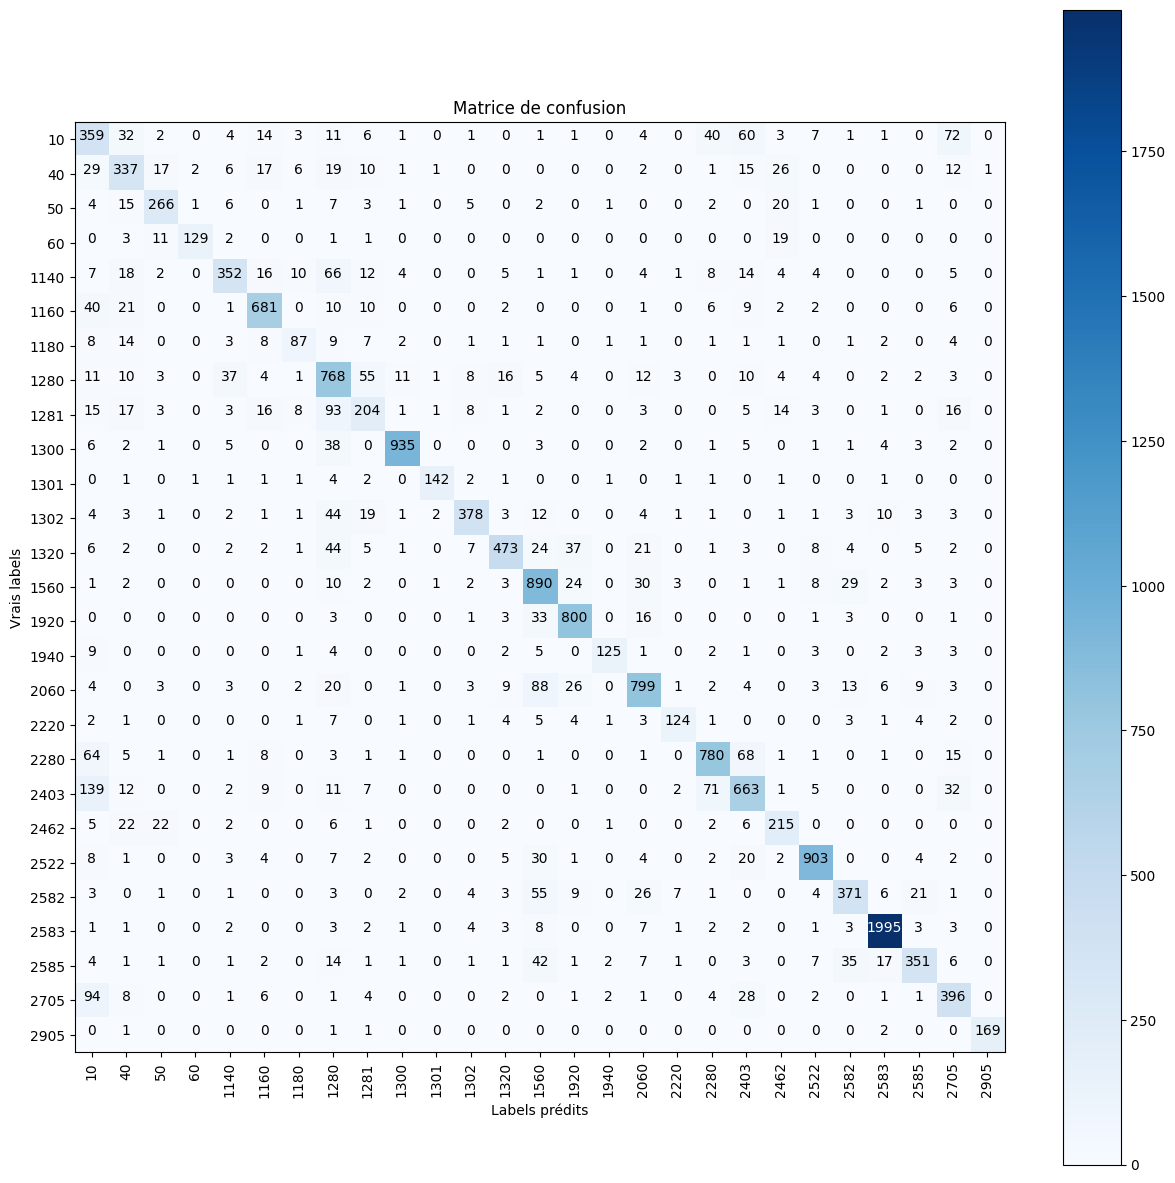

In [21]:
ds.show_confusion_matrix(y_orig, y_pred)

# Modèle 4 : classe RNN_SPACY

### Une tokenisation puis une lemmatisation en utilisant SPACY suivie d'une couche d'Embedding de tensorFlow
EMBEDDING + SPACY

In [ ]:
import Bibli_DataScience_3_3 as ds
import RNN_DataScience as rnn
import importlib
importlib.reload(ds)
importlib.reload(rnn)

section :  ['DOSSIER', 'FICHIER']


<module 'RNN_DataScience' from '/content/Rakuten_Text_Classification_TensorFlow/src/RNN_DataScience.py'>

#####  instanciation du modèle **RNN_SPACY**

In [22]:
spacy = rnn.RNN_SPACY("EMBEDDING SPACY")

Pandas Apply: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84916/84916 [00:00<00:00, 105424.32it/s]
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### **RNN_SPACY** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [23]:
# entrainement du modèle
train_acc,val_acc,tloss,tvalloss = spacy.fit_modele(5,True,spacy=True)

<class 'pandas.core.frame.DataFrame'>
Index: 67932 entries, 83256 to 20596
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67932 non-null  int64  
 1   designation     67932 non-null  object 
 2   description     44084 non-null  object 
 3   productid       67932 non-null  int64  
 4   imageid         67932 non-null  int64  
 5   PAYS_LANGUE     67932 non-null  object 
 6   RATIO_LANGUE    67932 non-null  float64
 7   ORIGINE_LANGUE  67932 non-null  object 
 8   pays_design     67932 non-null  object 
 9   Ratio_design    67932 non-null  float64
 10  pays_descr      44033 non-null  object 
 11  Ratio_descr     44033 non-null  float64
 12  descr_NaN       67932 non-null  bool   
 13  nom_image       67932 non-null  object 
 14  filepath        67932 non-null  object 
 15  phrases         67932 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 8.4+ MB
None
etape 

#### **RNN_SPACY** : Optionnel : Récupération des données

In [ ]:
# RECUPERATION
"""
train_acc,val_acc,tloss,tvalloss = spacy.restore_fit_arrays()
y_orig,y_pred = spacy.restore_predict_arrays()
df_pred = spacy.restore_predict_dataframe()

"""


#### **RNN_SPACY** : Affichage des precisions et des pertes par époque

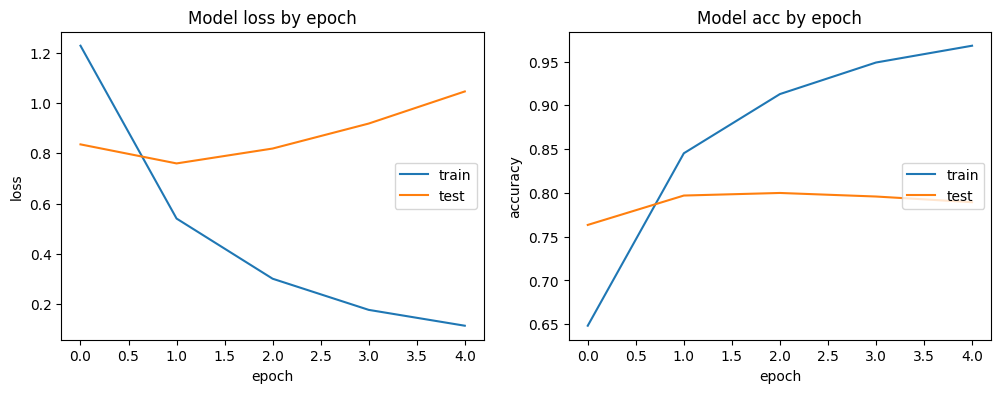

In [24]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

#### **RNN_SPACY** : Affichage des 3 principales prédictions par catégorie
Tableau des repartitions des **classes prédites** pour chaque **classe réelle**

In [25]:
df_pred = spacy.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,2705,0.322632,10,0.253612,2403,0.136437
1,40,40,0.641434,2462,0.061753,2705,0.057769
2,50,50,0.735119,2462,0.086310,40,0.071429
3,60,60,0.879518,2462,0.078313,40,0.018072
4,1140,1140,0.711610,1280,0.095506,1180,0.029963
5,1160,1160,0.852086,2705,0.036662,40,0.022756
6,1180,1180,0.614379,1280,0.071895,1140,0.065359
7,1280,1280,0.729979,1281,0.077002,1140,0.048255
8,1281,1281,0.531401,1280,0.161836,2705,0.065217
9,1300,1300,0.940535,1280,0.026759,1302,0.008920


#### **RNN_SPACY** : Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :  

1. Précision (**Precision**) : Le ratio des prédictions correctes pour chaque classe par rapport à toutes les prédictions faites pour cette classe.
2. Rappel (**Recall**) : Le ratio des prédictions correctes pour chaque classe par rapport au nombre total d'instances réelles de cette classe.
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une mesure unique de la performance qui équilibre les deux.
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [26]:

y_orig = spacy.get_y_orig()
y_pred = spacy.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 78.93900141309467 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.54      0.25      0.34       623
          40       0.62      0.64      0.63       502
          50       0.84      0.74      0.78       336
          60       0.79      0.88      0.83       166
        1140       0.72      0.71      0.72       534
        1160       0.85      0.85      0.85       791
        1180       0.40      0.61      0.49       153
        1280       0.66      0.73      0.69       974
        1281       0.56      0.53      0.54       414
        1300       0.93      0.94      0.93      1009
        1301       0.93      0.89      0.91       161
        1302       0.71      0.80      0.75       498
        1320       0.90      0.66      0.76       648
        1560       0.88      0.77      0.82      1015
        1920       0.86      0.93      0.89       861
        1940       0.85      0.8

#### **RNN_SPACY** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications  
mais aussi les erreurs (**faux positifs** et **faux négatifs**).  
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter  
au modèle ou aux données d'entraînement.  
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

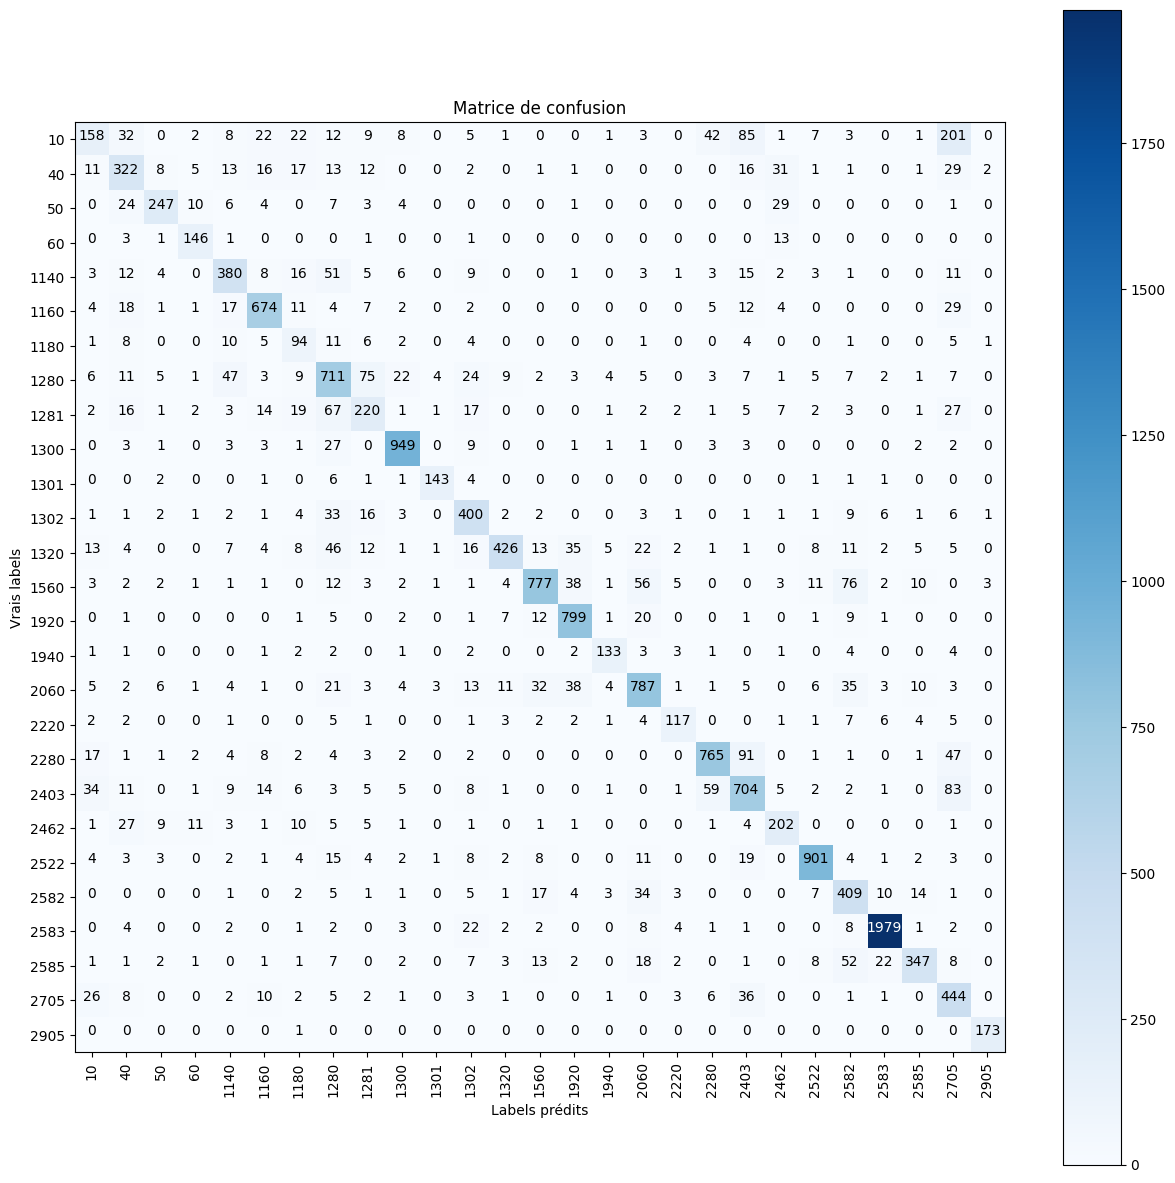

In [27]:
ds.show_confusion_matrix(y_orig, y_pred)

In [ ]:
# Modèle 5 : classe RNN_GRU

In [4]:
import Bibli_DataScience_3_3 as ds
import RNN_DataScience as rnn
import importlib
importlib.reload(ds)
importlib.reload(rnn)

section :  ['DOSSIER', 'FICHIER']


<module 'RNN_DataScience' from '/content/Rakuten_Text_Classification_TensorFlow/src/RNN_DataScience.py'>

In [ ]:
#####  instanciation du modèle **RNN_GRU**

In [28]:
gru =  rnn.RNN_GRU("EMBEDDING GRU")

Pandas Apply: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 84916/84916 [00:00<00:00, 116118.38it/s]
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#### **RNN_GRU ** : Lancement de l'entrainement
Récupération des Poids du Modèle, des précisions, des pertes et des prédictions.

In [29]:
# entrainement du modèle
train_acc,val_acc,tloss,tvalloss = gru.fit_modele(3,savefics=True,Train='Save')

<class 'pandas.core.frame.DataFrame'>
Index: 67932 entries, 83256 to 20596
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67932 non-null  int64  
 1   designation     67932 non-null  object 
 2   description     44084 non-null  object 
 3   productid       67932 non-null  int64  
 4   imageid         67932 non-null  int64  
 5   PAYS_LANGUE     67932 non-null  object 
 6   RATIO_LANGUE    67932 non-null  float64
 7   ORIGINE_LANGUE  67932 non-null  object 
 8   pays_design     67932 non-null  object 
 9   Ratio_design    67932 non-null  float64
 10  pays_descr      44033 non-null  object 
 11  Ratio_descr     44033 non-null  float64
 12  descr_NaN       67932 non-null  bool   
 13  nom_image       67932 non-null  object 
 14  filepath        67932 non-null  object 
 15  phrases         67932 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 8.4+ MB
None
etape 

I0000 00:00:1771534490.234370      56 service.cc:145] XLA service 0x78d29bbde560 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771534490.234438      56 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2026-02-19 20:54:50.317648: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1771534495.312429    1463 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1896', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1771534495.693881    1463 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1896', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1771534500.090484      56 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for 

2122/2123 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.4010 - loss: 2.0677

I0000 00:00:1771534994.627551    1573 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1896', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1771534995.155867    1573 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1896', 32 bytes spill stores, 32 bytes spill loads



2123/2123 ━━━━━━━━━━━━━━━━━━━━ 529s 243ms/step - accuracy: 0.4012 - loss: 2.0670 - val_accuracy: 0.8074 - val_loss: 0.6656 - learning_rate: 0.0010
Epoch 2/3
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 456s 215ms/step - accuracy: 0.8584 - loss: 0.4870 - val_accuracy: 0.8262 - val_loss: 0.6053 - learning_rate: 0.0010
Epoch 3/3
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 436s 205ms/step - accuracy: 0.9302 - loss: 0.2334 - val_accuracy: 0.8207 - val_loss: 0.7308 - learning_rate: 0.0010
531/531 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step
2123/2123 ━━━━━━━━━━━━━━━━━━━━ 43s 20ms/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step
Sauvegarde de jeu pour la concatenation
Sauvegarde de jeu du label encoder
Sauvegarde du model
EMBEDDING GRU_weight
../input/EMBEDDING GRU_weight.keras
Sauvegarde du tokenizer
y_test_original2[:5]  [1301 1140 2583 2280 2403]
Sauvegarde de jeu du label encoder
EMBEDDING GRU_weight
../input/EMBEDDING GRU_weight.keras


In [ ]:
#### **RNN_GRU** : Affichage des precisions et des pertes par époque

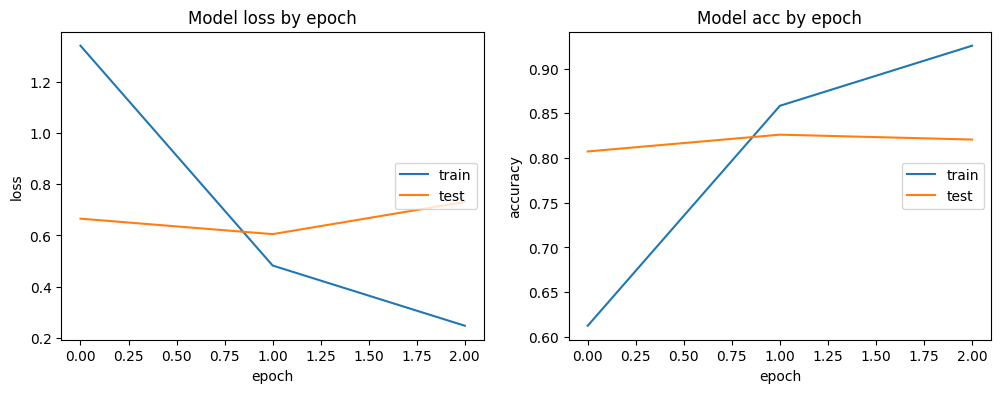

In [30]:
ds.plot_fit(train_acc,val_acc,tloss,tvalloss)

In [ ]:
#### **RNN_GRU** : Affichage des 3 principales prédictions par catégorie
Tableau des repartitions des **classes prédites** pour chaque **classe réelle**

In [31]:
df_pred = gru.get_df_pred()
df_pred

,Categorie,predict,pourc,predict2,pourc2,predict3,pourc3
0,10,10,0.600321,2403,0.097913,2280,0.073836
1,40,40,0.665339,10,0.065737,2462,0.057769
2,50,50,0.818452,2462,0.059524,40,0.032738
3,60,60,0.855422,2462,0.060241,50,0.048193
4,1140,1140,0.790262,1280,0.052434,10,0.026217
5,1160,1160,0.881163,10,0.039191,40,0.020228
6,1180,1180,0.470588,1140,0.098039,1281,0.091503
7,1280,1280,0.708419,1281,0.068789,1140,0.059548
8,1281,1281,0.572464,1280,0.154589,10,0.048309
9,1300,1300,0.942517,1280,0.020813,10,0.010902


In [ ]:
#### **RNN_GRU** : Rapport de classification
Ce rapport inclut des métriques comme la précision, le rappel (recall), le score F1 et le support pour chaque classe individuelle :

1. Précision (**Precision**) : Le ratio des prédictions correctes pour chaque classe par rapport à toutes les prédictions faites pour cette classe.
2. Rappel (**Recall**) : Le ratio des prédictions correctes pour chaque classe par rapport au nombre total d'instances réelles de cette classe.
3. **Score F1** : La moyenne harmonique de la précision et du rappel, fournissant une mesure unique de la performance qui équilibre les deux.
4. **Support** : Le nombre d'occurrences réelles de chaque classe dans l'ensemble de test.

In [32]:

y_orig = gru.get_y_orig()
y_pred = gru.get_y_pred()
_,_ = ds.get_classification_report(y_orig, y_pred)

Précision de la prédiction: 82.07136128120584 %
Evaluation détaillée de la Classification par RDF :
 
               precision    recall  f1-score   support

          10       0.44      0.60      0.50       623
          40       0.70      0.67      0.68       502
          50       0.78      0.82      0.80       336
          60       0.88      0.86      0.87       166
        1140       0.71      0.79      0.75       534
        1160       0.91      0.88      0.89       791
        1180       0.69      0.47      0.56       153
        1280       0.73      0.71      0.72       974
        1281       0.65      0.57      0.61       414
        1300       0.94      0.94      0.94      1009
        1301       0.95      0.91      0.93       161
        1302       0.88      0.79      0.83       498
        1320       0.83      0.81      0.82       648
        1560       0.86      0.81      0.84      1015
        1920       0.90      0.94      0.92       861
        1940       0.91      0.8

In [ ]:
#### **RNN_GRU** : Génération et Affichage de la Matrice de Confusion
1. La **matrice de confusion** fournit une représentation visuelle des performances du modèle, montrant non seulement les bonnes classifications
mais aussi les erreurs (**faux positifs** et **faux négatifs**).
2. En identifiant où le modèle a échoué (c.-à-d., les cellules non-diagonales de la matrice), on peut cibler les améliorations à apporter
au modèle ou aux données d'entraînement.
3. Analyser la matrice de confusion permet d'identifier des classes spécifiques qui sont souvent confondues, ce qui peut indiquer un besoin d'ajustement des caractéristiques d'entrée ou d'ajout de données supplémentaires pour ces classes.

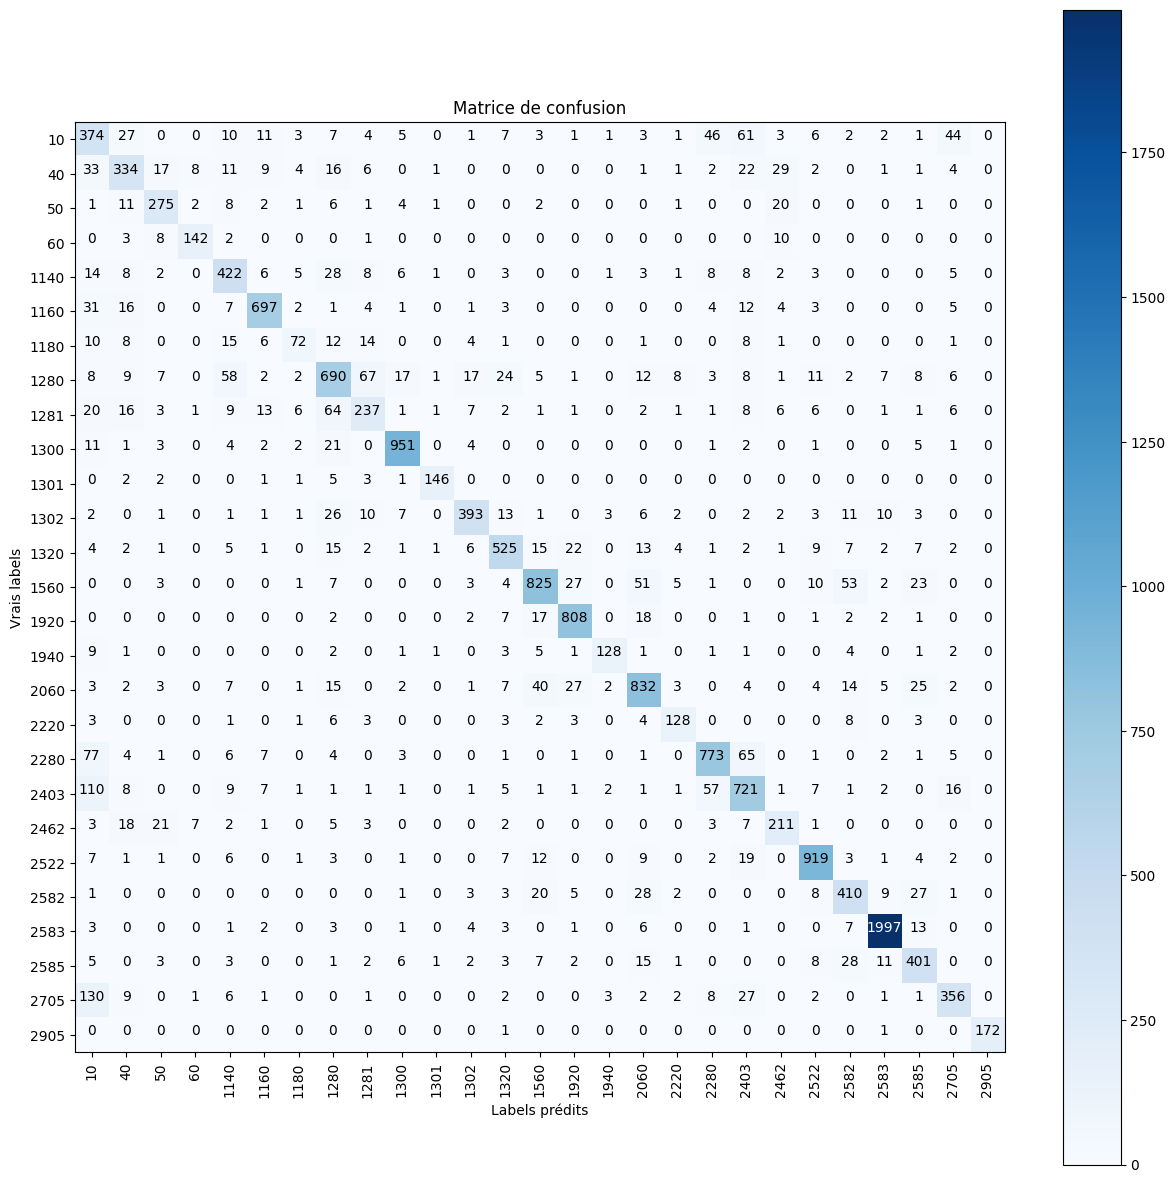

In [33]:
ds.show_confusion_matrix(y_orig, y_pred)